<a href="https://colab.research.google.com/github/saebido/FTW3-Day3/blob/master/HW6_Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [63]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [64]:
data.shape

(8950, 18)

In [65]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [66]:
data['CUST_ID'].nunique()

8950

In [67]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

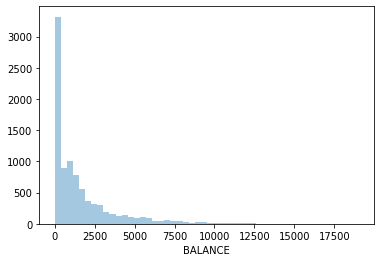

In [68]:
sns.distplot(data['BALANCE'], kde=False)

In [69]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
10%        179.617069
20%        313.141031
30%        459.438287
40%        624.268198
50%        856.901546
60%       1185.259270
70%       1604.092113
80%       2314.017654
90%       3923.906642
max      50721.483360
Name: PAYMENTS, dtype: float64

In [70]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

In [0]:
from sklearn.cluster import KMeans

In [72]:
# Get features we need
features = ['BALANCE','PURCHASES','PAYMENTS']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,BALANCE,PURCHASES,PAYMENTS
0,40.900749,95.40,201.802084
1,3202.467416,0.00,4103.032597
2,2495.148862,773.17,622.066742
3,1666.670542,1499.00,0.000000
4,817.714335,16.00,678.334763


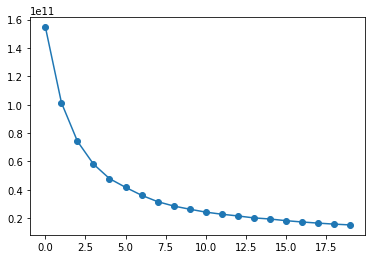

In [73]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=5, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [75]:
new_data.head()

,BALANCE,PURCHASES,PAYMENTS,labels
0,40.900749,95.40,201.802084,1
1,3202.467416,0.00,4103.032597,0
2,2495.148862,773.17,622.066742,1
3,1666.670542,1499.00,0.000000,1
4,817.714335,16.00,678.334763,1


In [88]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,PURCHASES,PAYMENTS,labels
count,1067.000000,1067.000000,1067.000000,1067.0
mean,1551.346985,2774.794667,4707.747195,0.0
std,1327.065868,2309.001905,1902.704901,0.0
min,0.000000,0.000000,508.797444,0.0
25%,410.637899,738.495000,3323.640394,0.0
50%,1155.338824,2673.300000,4237.359587,0.0
75%,2429.056057,4020.575000,5848.422720,0.0
max,6773.941979,14215.000000,11267.694780,0.0


Cluster 0: MID BALANCE, HIGH PURCHASES, HIGH PAYMENTS


In [79]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,PURCHASES,PAYMENTS,labels
count,6676.000000,6676.000000,6676.000000,6676.0
mean,818.798340,526.068917,807.247378,1.0
std,869.619101,644.417638,702.048780,0.0
min,0.000000,0.000000,0.000000,1.0
25%,69.115621,37.225000,299.884450,1.0
50%,497.913956,291.450000,584.356164,1.0
75%,1338.952742,771.290000,1129.622243,1.0
max,3737.175713,5359.020000,3762.550924,1.0


Cluster 1: LOW BALANCE, LOW PURCHASES, LOW PAYMENTS

In [80]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,PURCHASES,PAYMENTS,labels
count,171.000000,171.000000,171.000000,171.0
mean,4764.154794,4942.705088,14323.081456,2.0
std,3568.690508,5299.175691,5890.850630,0.0
min,0.000000,0.000000,7116.531862,2.0
25%,1678.549871,14.970000,10705.769045,2.0
50%,4476.739146,3030.330000,12124.639570,2.0
75%,6942.548958,9794.255000,16719.410865,2.0
max,15244.748650,22500.000000,40627.595240,2.0


Cluster 2: HIGH BALANCE, HIGH PURCHASES, VERY HIGH PAYMENTS

In [81]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,BALANCE,PURCHASES,PAYMENTS,labels
count,22.000000,22.000000,22.000000,22.0
mean,5407.063881,28036.451364,28986.171017,3.0
std,4401.652640,8558.960948,8704.982855,0.0
min,1268.809031,12551.950000,17005.409690,3.0
25%,2825.700860,22171.827500,22673.357385,3.0
50%,3422.898250,26492.365000,26953.675920,3.0
75%,6271.282924,32229.672500,33420.650643,3.0
max,19043.138560,49039.570000,50721.483360,3.0


Cluster 3: HIGH BALANCE, VERY HIGH PURCHASES, VERY HIGH PAYMENTS

In [82]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,BALANCE,PURCHASES,PAYMENTS,labels
count,1014.000000,1014.000000,1014.000000,1014.0
mean,5864.732625,1029.523432,1984.561173,4.0
std,2162.676061,1566.489961,1292.483505,0.0
min,3007.664861,0.000000,0.000000,4.0
25%,4334.837667,0.000000,1178.757115,4.0
50%,5340.168027,342.500000,1612.819977,4.0
75%,6877.321008,1452.490000,2372.644067,4.0
max,18495.558550,10166.690000,8848.955996,4.0


Cluster 4: HIGH BALANCE, MID PURCHASES, MID PAYMENTS